In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import sympy 
from sympy import * 
import math

In [2]:
#matrix:
n=10
L=np.zeros((n,n))


In [3]:
# first and last diagonal element are ones:
L[0,0]=1
L[n-1,n-1]=1
L
for i in range(n):
    for j in range(n):
        if i==j+1:
            L[i,j]=-1
        elif j== i+1:
            L[i,j]=-1
        elif i==j and i!=0 and i!=n-1:
            L[i,j]=2
          
        
        
L

array([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]])

In [4]:
# D: degree matrix: is a diagonal matrix 
# A: is the adjacency matrix
D=np.zeros((n,n))
A=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i==j:
            D[i,j]=L[i,j]
        else:
            A[i,j]=-L[i,j]
# check:
check=D-A==L # it must give an nxn matrix all 'true' values

In [5]:
# finding eigen values:
eigen_values=np.linalg.eig(A)

eigen_values[0]


array([-1.91898595, -1.68250707, -1.30972147, -0.83083003, -0.28462968,
        0.28462968,  1.91898595,  1.68250707,  1.30972147,  0.83083003])

In [6]:

# random walk network using adnjacency matrix:
def random_adjacency_matrix(n):   
    matrix = [[random.randint(0, 1) for i in range(n)] for j in range(n)]

    # No vertex connects to itself
    for i in range(n):
        matrix[i][i] = 0

    # If i is connected to j, j is connected to i
    for i in range(n):
        for j in range(n):
            matrix[j][i] = matrix[i][j]

    return matrix

random_adjacency_matrix(10)

[[0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
 [0, 1, 0, 1, 0, 1, 1, 0, 1, 1],
 [0, 0, 1, 0, 1, 0, 1, 1, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 1, 1, 0]]

In [7]:
import networkx, random
G = networkx.binomial_graph(50, random.random()) # 50 nodes, random probability of an edge


In [8]:
n=10
p=1/2
nx.gnp_random_graph(n,p)

node degree clustering
0 4 0.3333333333333333
1 5 0.3
2 4 0.16666666666666666
3 4 0.5
4 4 0.16666666666666666
5 2 0
6 2 0
7 5 0.3
8 5 0.2
9 5 0.3

the adjacency list
0 8 2 9 1
1 2 4 9 3
2 7 6
3 9 8 7
4 7 6 8
5 8 9
6
7 9 8
8
9


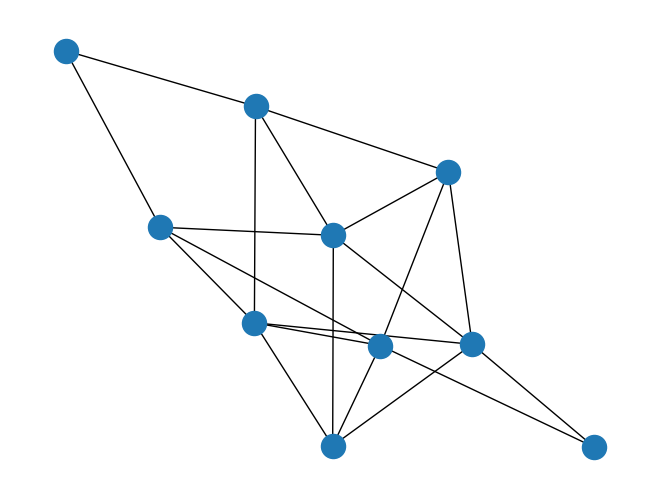

In [9]:
# erdos reiny network:
# representing the graph:
n = 10  # 10 nodes
m = 20  # 20 edges
seed = 20160  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)

# some properties
print("node degree clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
nx.draw(G, pos=pos)
plt.show()

In [10]:
adj=nx.adjacency_matrix(G)
print(adj.todense())

C:\Users\Abu El Bish\AppData\Local\Temp\ipykernel_19904\2017923886.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj=nx.adjacency_matrix(G)


[[0 1 1 0 0 0 0 0 1 1]
 [1 0 1 1 1 0 0 0 0 1]
 [1 1 0 0 0 0 1 1 0 0]
 [0 1 0 0 0 0 0 1 1 1]
 [0 1 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 1 1]
 [1 0 0 1 1 1 0 1 0 0]
 [1 1 0 1 0 1 0 1 0 0]]


In [11]:
# getting laplacian for erdos reiny:
erdos_laplacian=nx.laplacian_matrix(G)
print(erdos_laplacian.todense())

[[ 4 -1 -1  0  0  0  0  0 -1 -1]
 [-1  5 -1 -1 -1  0  0  0  0 -1]
 [-1 -1  4  0  0  0 -1 -1  0  0]
 [ 0 -1  0  4  0  0  0 -1 -1 -1]
 [ 0 -1  0  0  4  0 -1 -1 -1  0]
 [ 0  0  0  0  0  2  0  0 -1 -1]
 [ 0  0 -1  0 -1  0  2  0  0  0]
 [ 0  0 -1 -1 -1  0  0  5 -1 -1]
 [-1  0  0 -1 -1 -1  0 -1  5  0]
 [-1 -1  0 -1  0 -1  0 -1  0  5]]


<class 'networkx.utils.decorators.argmap'> compilation 24:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


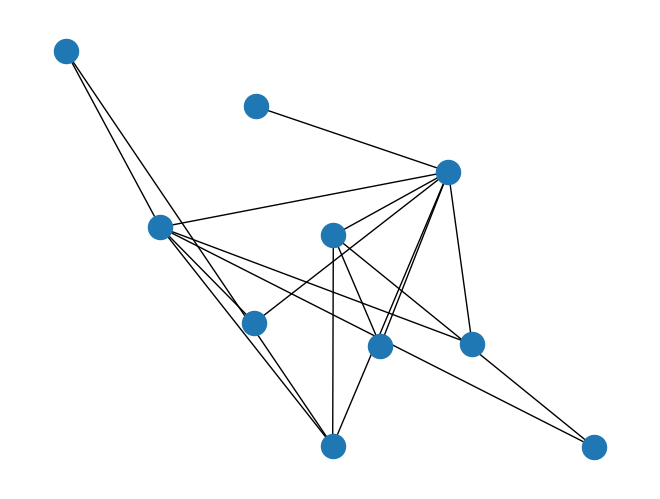

In [12]:
# for albert graph:
node_number = 10 # randomly chosen
initial_nodes = 2 # randomly chosen
albert_G = networkx.barabasi_albert_graph(node_number, initial_nodes)

nx.draw(albert_G,pos=pos)

In [13]:
# getting the adjacency matrix for albert graph:
albert_adj=nx.adjacency_matrix(albert_G)
print(albert_adj.todense())

[[0 1 1 1 1 0 0 1 1 1]
 [1 0 0 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 1 0 0 0]
 [1 0 0 1 0 1 1 1 0 1]
 [0 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]]


C:\Users\Abu El Bish\AppData\Local\Temp\ipykernel_19904\889101374.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  albert_adj=nx.adjacency_matrix(albert_G)


In [14]:
albert_laplacian=nx.laplacian_matrix(albert_G)
print(albert_laplacian.todense())

[[ 7 -1 -1 -1 -1  0  0 -1 -1 -1]
 [-1  4  0 -1  0 -1  0  0 -1  0]
 [-1  0  1  0  0  0  0  0  0  0]
 [-1 -1  0  4 -1  0 -1  0  0  0]
 [-1  0  0 -1  6 -1 -1 -1  0 -1]
 [ 0 -1  0  0 -1  2  0  0  0  0]
 [ 0  0  0 -1 -1  0  2  0  0  0]
 [-1  0  0  0 -1  0  0  2  0  0]
 [-1 -1  0  0  0  0  0  0  2  0]
 [-1  0  0  0 -1  0  0  0  0  2]]


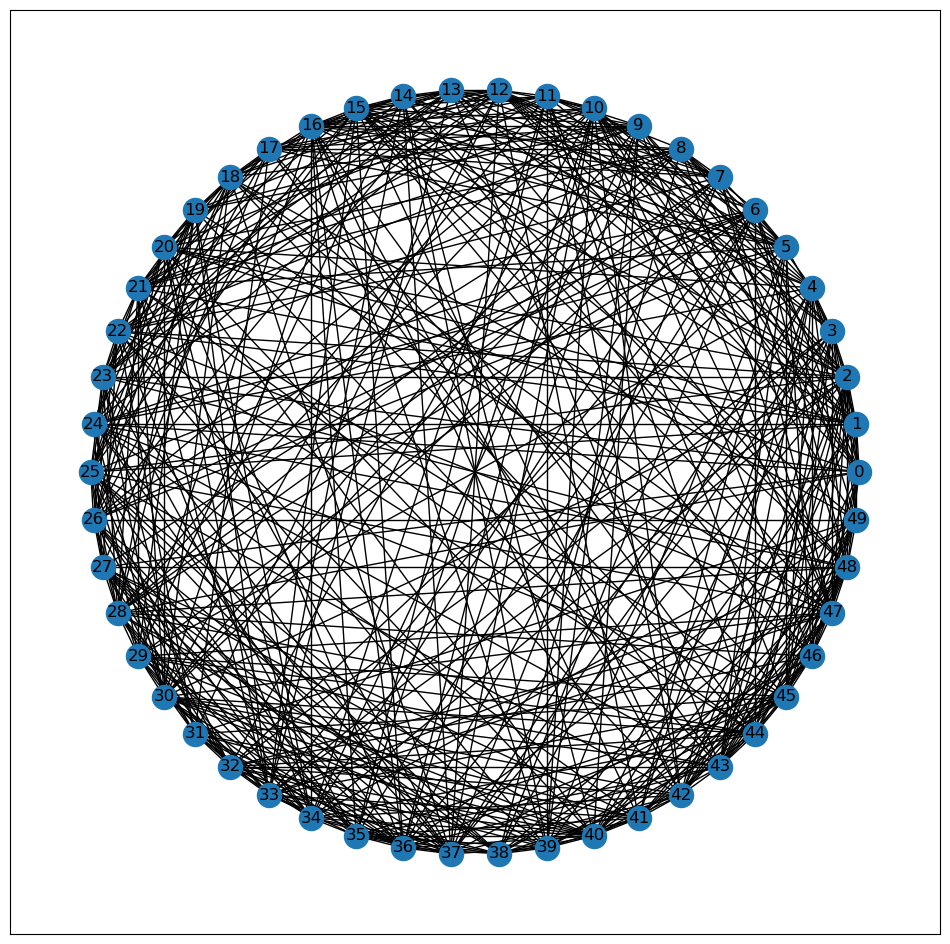

In [16]:
l=np.arange(1,100,1)
z=np.arange(1,50,1)
small_world_G = nx.watts_strogatz_graph(n = 50, k = 20, p = 0.5)
pos = nx.circular_layout(small_world_G)
plt.figure(figsize = (12, 12))
nx.draw_networkx(small_world_G, pos)

In [17]:
small_world_matrix=nx.adjacency_matrix(small_world_G)
print(small_world_matrix.todense())

[[0 1 1 ... 1 1 0]
 [1 0 1 ... 1 0 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 0]
 [1 0 1 ... 1 0 1]
 [0 1 1 ... 0 1 0]]


C:\Users\Abu El Bish\AppData\Local\Temp\ipykernel_19904\1753818197.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  small_world_matrix=nx.adjacency_matrix(small_world_G)


In [18]:
small_world_laplacian=nx.laplacian_matrix(small_world_G)
print(small_world_laplacian.todense())

[[19 -1 -1 ... -1 -1  0]
 [-1 19 -1 ... -1  0 -1]
 [-1 -1 26 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... 24 -1  0]
 [-1  0 -1 ... -1 23 -1]
 [ 0 -1 -1 ...  0 -1 18]]


In [25]:
# tight binding :
# small world:

# create a small world first, and view it:
    
tight_small_world_G = nx.watts_strogatz_graph(n = 50, k =30, p = 0.5)
    
# find the laplacian and get its eigenvalues:

tight_small_world_laplacian=nx.laplacian_matrix(tight_small_world_G)

small_tight_eigen_values = np.linalg.eigvals(tight_small_world_laplacian.toarray())

small_tight_eigen_values


array([-1.00111491e-14,  3.90028584e+01,  2.26877459e+01,  2.33869331e+01,
        2.35001349e+01,  3.75801819e+01,  3.73781788e+01,  3.69339257e+01,
        2.43524795e+01,  3.64913987e+01,  3.63633523e+01,  3.59697686e+01,
        2.47735538e+01,  2.50636851e+01,  3.55110530e+01,  3.51364816e+01,
        3.48769762e+01,  3.44255310e+01,  3.41939560e+01,  3.40444908e+01,
        3.37481938e+01,  2.55751859e+01,  2.58991405e+01,  2.61075208e+01,
        3.32771485e+01,  3.29884348e+01,  2.66363497e+01,  2.68922313e+01,
        2.69211798e+01,  3.25076697e+01,  3.21545638e+01,  3.19639967e+01,
        3.17621929e+01,  3.14998531e+01,  3.12988519e+01,  3.11646932e+01,
        3.08508009e+01,  3.05226145e+01,  3.03152083e+01,  3.01520293e+01,
        2.98698949e+01,  2.78459906e+01,  2.77567147e+01,  2.80925165e+01,
        2.82071759e+01,  2.94082567e+01,  2.84464393e+01,  2.85898161e+01,
        2.90437046e+01,  2.88289463e+01])

In [20]:

# now we know that since the hamiltonian is represented as : H= alpha i + beta (lamda), where alpha = 0 and beta is -1
#then our hamiltonian is just: H=-lamda which is the eigen values we just got.

#partition function is the summation : exp(beta H), them:
# we'll use b to symbolize for beta
b= symbols('b')

small_world_partition_fn=[]
for i in small_tight_eigen_values:
    small_world_partition_fn+=[exp(i*b)]
    
z=np.array(sum(small_world_partition_fn))
                    
# to get the entropy: it is the derivative of the partition fn with respect to beta, then:

entropy = Derivative(z,b)

# helmotz free energy is has the formula:kBTlnz  when z is the partition fn, and kT here is beta,then:
#since we don't have a certain value B will define it as a variable here.
B= symbols('B')

helmotz=[]
for i in (small_world_partition_fn):
    helmotz+=[B*b*log(i)]
# to find the Gibbs free energy: we know that it has the formula of: -KT(ln(z)-dz/dv). 
# we already know that p=(n/V)KT, we can use it to get that 1/dv =(p/NK)(1/dT). therefore:
K=1.380649 * 10**(-23)
T=symbols('T')
V=symbols('V')
N=symbols('N')
P=symbols('P')
small_world_partition_fn_V=[]
# change the variable beta now in z to its relation with v, so that python can know how to derive it with respect to v:
for i in small_tight_eigen_values:
    small_world_partition_fn_V+=[exp(i*P*V/N)]
    
# gibbs free energy:

for i in (small_world_partition_fn):
    gibbs_energy=-K*T*(log(i,2)-Derivative(log(i,2),V))
    

In [21]:
# now we need to repeat the same process for the other two networks: erdos and albert:

In [27]:
# erdos:

#create network:
n = 10  # 10 nodes
m = 20  # 20 edges
seed = 20160  # seed random number generators for reproducibility

tight_erdos_G = nx.gnm_random_graph(n, m, seed=seed)

# get laplacian and its eigenvalues:


tight_erdos_laplacian=nx.laplacian_matrix(tight_erdos_G)

tight_erdos_eigen_values = np.linalg.eigvals(tight_erdos_laplacian.toarray())

tight_erdos_eigen_values

array([0.        , 7.47810677, 7.16813093, 1.35882376, 2.16077796,
       3.16505286, 5.40795386, 4.        , 4.50320987, 4.75794399])

In [30]:
erdos_partition_fn=[]
for i in tight_erdos_eigen_values:
    erdos_partition_fn+=[exp(i*b)]
    
z=np.array(sum(erdos_partition_fn))

entropy = Derivative(z,b)

helmotz=[]
for i in (erdos_partition_fn):
    helmotz+=[B*b*log(i)]

K=1.380649 * 10**(-23)

erdos_partition_fn_V=[]
# change the variable beta now in z to its relation with v, so that python can know how to derive it with respect to v:
for i in tight_erdos_eigen_values:
    erdos_partition_fn_V+=[exp(i*P*V/N)]
    
# gibbs free energy:

for i in (erdos_partition_fn):
    gibbs_energy=-K*T*(log(i,2)-Derivative(log(i,2),V))
    


In [32]:
# finally for albert netwrok:

node_number = 10 # randomly chosen
initial_nodes = 2 # randomly chosen
albert_G = networkx.barabasi_albert_graph(node_number, initial_nodes)

albert_laplacian=nx.laplacian_matrix(albert_G)

albert_eigen_values = np.linalg.eigvals(albert_laplacian.toarray())

albert_eigen_values

array([ 8.17176096e+00,  6.22050978e+00,  4.60385204e+00, -1.29286579e-15,
        3.59941450e+00,  3.13862884e+00,  8.76674374e-01,  1.61214025e+00,
        1.77701926e+00,  2.00000000e+00])

In [33]:
albert_partition_fn=[]
for i in albert_eigen_values:
    albert_partition_fn+=[exp(i*b)]
    
z=np.array(sum(albert_partition_fn))

entropy = Derivative(z,b)

helmotz=[]
for i in (albert_partition_fn):
    helmotz+=[B*b*log(i)]

K=1.380649 * 10**(-23)

albert_partition_fn_V=[]
# change the variable beta now in z to its relation with v, so that python can know how to derive it with respect to v:
for i in albert_eigen_values:
    albert_partition_fn_V+=[exp(i*P*V/N)]
    
# gibbs free energy:

for i in (albert_partition_fn):
    gibbs_energy=-K*T*(log(i,2)-Derivative(log(i,2),V))



# With this we would have calculated the partition function, enrtropy, helmotz and gibbs free energy of the three networks: albert, erdos and small world.